In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
airline=pd.read_excel("/content/EastWestAirlines.xlsx", sheet_name='data')

In [3]:
airline.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [4]:
airline.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [5]:
airline = airline.rename({'ID#':'ID','Award?':'Award'}, axis = 1)
airline.head()

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [6]:
def check_int(df):
    count = 0
    for row in df:
        try:
            if type(row) != int:
                df.loc[count] = np.nan
        except:
            pass
        count +=1

In [7]:
check_int(airline[airline.columns])


In [8]:
airline.isnull().sum()

ID                   0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award                0
dtype: int64

In [9]:
airline.describe()

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
count,3999.000000,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,2014.819455,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1160.764358,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,1.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1010.500000,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,2016.000000,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,3020.500000,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,4021.000000,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


In [10]:
airline.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,3999.0,2014.819455,1160.764358,1.0,1010.5,2016.0,3020.5,4021.0
Balance,3999.0,73601.327582,100775.664958,0.0,18527.5,43097.0,92404.0,1704838.0
Qual_miles,3999.0,144.114529,773.663804,0.0,0.0,0.0,0.0,11148.0
cc1_miles,3999.0,2.059515,1.376919,1.0,1.0,1.0,3.0,5.0
cc2_miles,3999.0,1.014504,0.147650,1.0,1.0,1.0,1.0,3.0
cc3_miles,3999.0,1.012253,0.195241,1.0,1.0,1.0,1.0,5.0
Bonus_miles,3999.0,17144.846212,24150.967826,0.0,1250.0,7171.0,23800.5,263685.0
Bonus_trans,3999.0,11.601900,9.603810,0.0,3.0,12.0,17.0,86.0
Flight_miles_12mo,3999.0,460.055764,1400.209171,0.0,0.0,0.0,311.0,30817.0
Flight_trans_12,3999.0,1.373593,3.793172,0.0,0.0,0.0,1.0,53.0


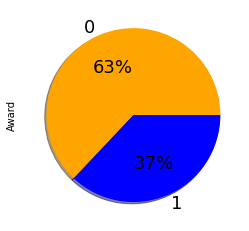

In [11]:
airline['Award'].value_counts().plot(kind='pie', autopct='%2.0f%%', fontsize='18', colors = ['Orange','Blue'], shadow =True)
plt.show()

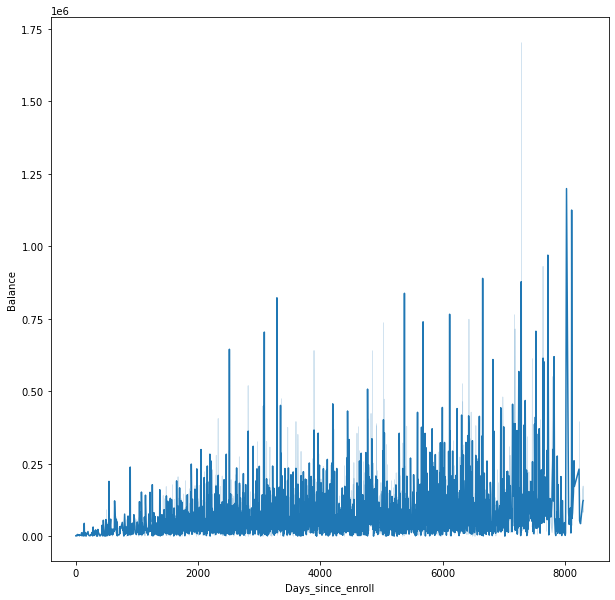

In [12]:
import seaborn as sns
fig, ax =plt.subplots(figsize=(10,10))
ax = sns.lineplot(x= 'Days_since_enroll', y='Balance',data = airline)

AGLOMERATIVE CLUSTERING


In [13]:
air1 = airline.drop('ID', axis = 1)
air1.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1


In [14]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
scale1 = MinMaxScaler()
scale2 = StandardScaler()

In [15]:
scale1 = scale1.fit_transform(air1)
print(scale1)
print('\n')
scale2 = scale2.fit_transform(air1)
print(scale2)

[[0.01650773 0.         0.         ... 0.         0.84374246 0.        ]
 [0.01128788 0.         0.         ... 0.         0.83988425 0.        ]
 [0.02425685 0.         0.         ... 0.         0.84784181 0.        ]
 ...
 [0.0431695  0.         0.5        ... 0.         0.16879672 1.        ]
 [0.03220189 0.         0.         ... 0.01886792 0.16867615 0.        ]
 [0.00176908 0.         0.         ... 0.         0.16831444 0.        ]]


[[-4.51140783e-01 -1.86298687e-01 -7.69578406e-01 ... -3.62167870e-01
   1.39545434e+00 -7.66919299e-01]
 [-5.39456874e-01 -1.86298687e-01 -7.69578406e-01 ... -3.62167870e-01
   1.37995704e+00 -7.66919299e-01]
 [-3.20031232e-01 -1.86298687e-01 -7.69578406e-01 ... -3.62167870e-01
   1.41192021e+00 -7.66919299e-01]
 ...
 [-4.29480975e-05 -1.86298687e-01  6.83121167e-01 ... -3.62167870e-01
  -1.31560393e+00  1.30391816e+00]
 [-1.85606976e-01 -1.86298687e-01 -7.69578406e-01 ... -9.85033311e-02
  -1.31608822e+00 -7.66919299e-01]
 [-7.00507951e-01 -1.862

DENDROGRAM

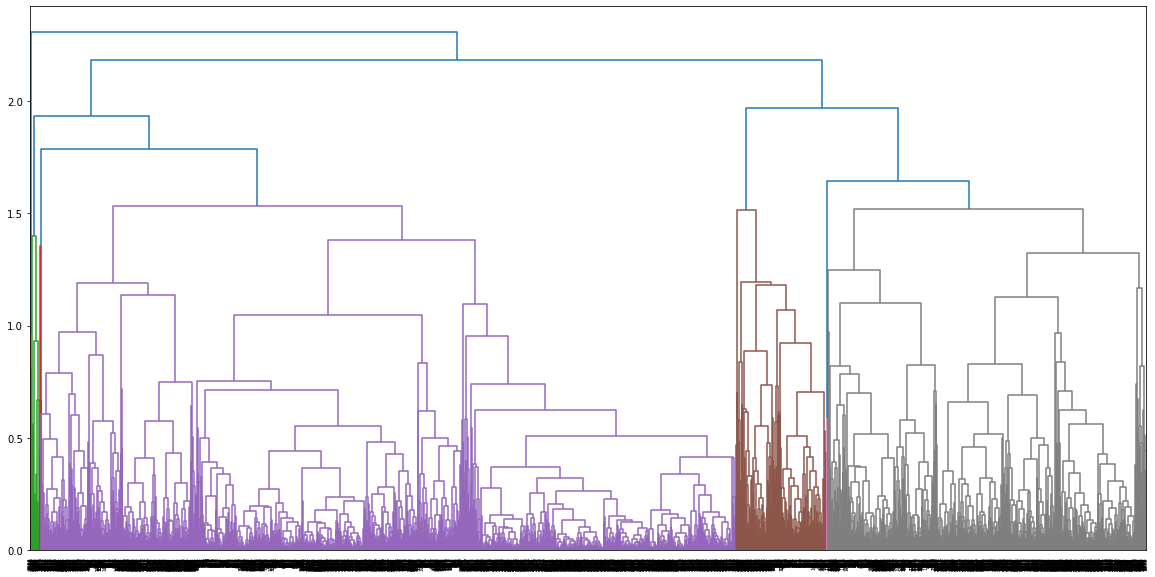

In [16]:
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(20, 10))  
dendo=sch.dendrogram(sch.linkage(scale1,'complete'))

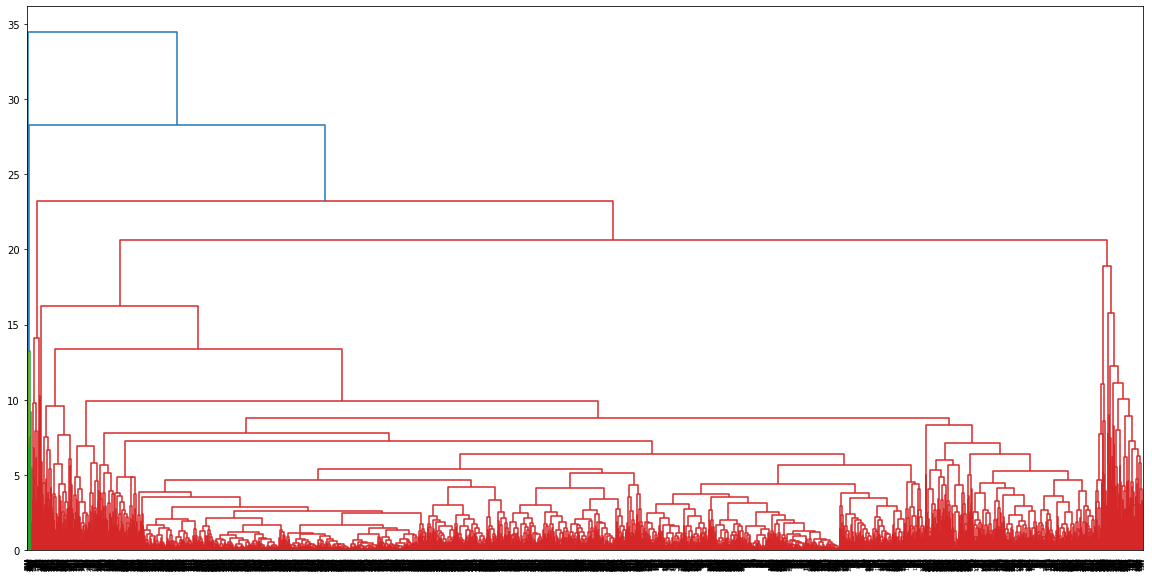

In [17]:
plt.figure(figsize=(20, 10))  
dendo=sch.dendrogram(sch.linkage(scale2,'complete'))

In [18]:
from sklearn.cluster import AgglomerativeClustering
cluster=AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='ward')
cluster

AgglomerativeClustering(n_clusters=5)

In [19]:
y=pd.DataFrame(cluster.fit_predict(scale1),columns=['clusterid'])
y['clusterid'].value_counts()

1    1011
0     946
2     808
4     699
3     535
Name: clusterid, dtype: int64

In [20]:
airline['clusterid_1']=cluster.labels_
air1['clusterid_1']=cluster.labels_

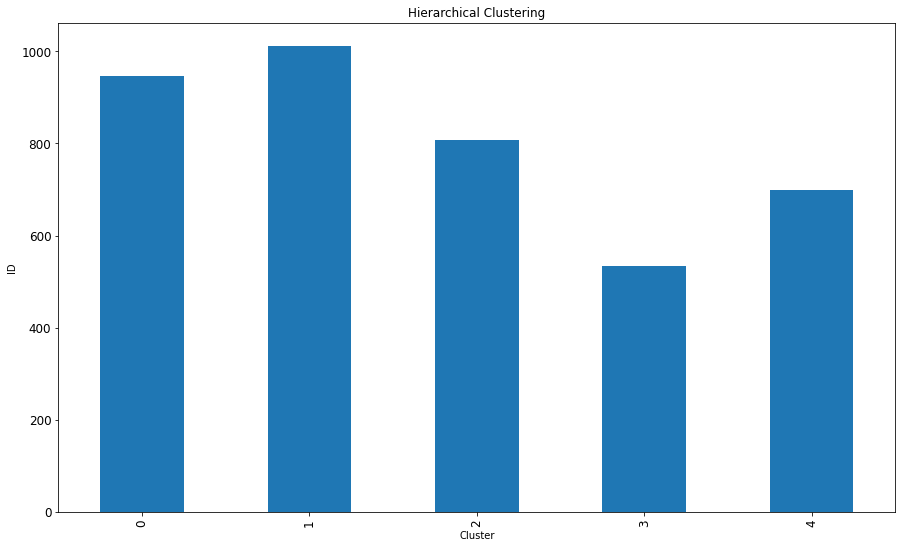

In [21]:
fig, ax = plt.subplots(figsize=(15, 9))
airline.groupby(['clusterid_1']).count()['ID'].plot(kind='bar')
plt.ylabel('ID')
plt.title('Hierarchical Clustering')
ax.set_xlabel('Cluster')
ax.set_ylabel('ID')
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.show()

In [22]:
air1.groupby('clusterid_1').agg(['mean']).reset_index()

,clusterid_1,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,79848.233615,285.097252,1.699789,1.024313,1.000000,12079.774841,12.133192,781.939746,2.369979,4372.173362,1.0
1,1,43313.653808,21.506429,1.000000,1.033630,1.000989,2562.614243,5.474777,169.510386,0.523244,4940.680514,0.0
2,2,106221.111386,161.262376,3.198020,1.001238,1.025990,26458.257426,16.363861,198.733911,0.558168,4367.250000,0.0
3,3,127475.028037,160.801869,4.362617,1.000000,1.050467,58656.919626,22.235514,991.110280,3.005607,5072.226168,1.0
4,4,30013.416309,98.054363,1.000000,1.000000,1.000000,2552.569385,6.101574,340.274678,0.948498,1568.864092,0.0


In [23]:
from sklearn.metrics import silhouette_score
sil_score= silhouette_score(scale1, cluster.labels_)
sil_score

0.3762586351398372

In [24]:
y=pd.DataFrame(cluster.fit_predict(scale2),columns=['clusterid'])
y['clusterid'].value_counts()

1    2446
0    1362
2     130
3      43
4      18
Name: clusterid, dtype: int64

In [25]:
airline['clusterid_2']=cluster.labels_
air1['clusterid_2']=cluster.labels_

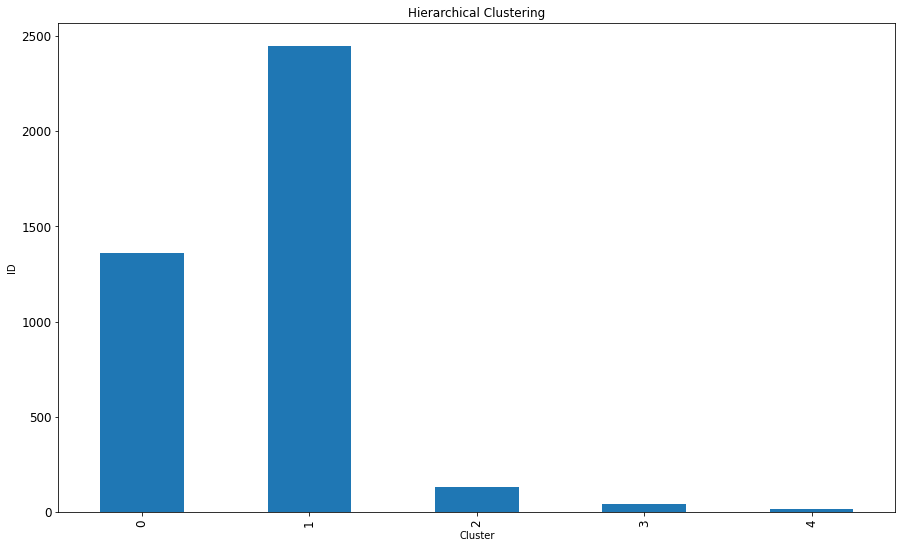

In [26]:
fig, ax = plt.subplots(figsize=(15, 9))
airline.groupby(['clusterid_2']).count()['ID'].plot(kind='bar')
plt.ylabel('ID')
plt.title('Hierarchical Clustering')
ax.set_xlabel('Cluster')
ax.set_ylabel('ID')
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.show()

In [27]:
air1.groupby('clusterid_1').agg(['mean']).reset_index()

,clusterid_1,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,clusterid_2
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,79848.233615,285.097252,1.699789,1.024313,1.000000,12079.774841,12.133192,781.939746,2.369979,4372.173362,1.0,0.627907
1,1,43313.653808,21.506429,1.000000,1.033630,1.000989,2562.614243,5.474777,169.510386,0.523244,4940.680514,0.0,1.044510
2,2,106221.111386,161.262376,3.198020,1.001238,1.025990,26458.257426,16.363861,198.733911,0.558168,4367.250000,0.0,0.507426
3,3,127475.028037,160.801869,4.362617,1.000000,1.050467,58656.919626,22.235514,991.110280,3.005607,5072.226168,1.0,0.261682
4,4,30013.416309,98.054363,1.000000,1.000000,1.000000,2552.569385,6.101574,340.274678,0.948498,1568.864092,0.0,1.011445


In [28]:
from sklearn.metrics import silhouette_score

sil_score= silhouette_score(scale2, cluster.labels_)
sil_score

0.3098805307874414

K-MEANS

In [29]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

In [30]:
scale1 = MinMaxScaler()
scale2 = StandardScaler()

In [31]:
scale1_data = scale1.fit_transform(air1)
print(scale1_data)
print('\n')
scale2_data = scale2.fit_transform(air1)
print(scale2_data)

[[0.01650773 0.         0.         ... 0.         0.25       0.25      ]
 [0.01128788 0.         0.         ... 0.         0.25       0.25      ]
 [0.02425685 0.         0.         ... 0.         0.25       0.25      ]
 ...
 [0.0431695  0.         0.5        ... 1.         0.         0.        ]
 [0.03220189 0.         0.         ... 0.         1.         0.25      ]
 [0.00176908 0.         0.         ... 0.         1.         0.25      ]]


[[-4.51140783e-01 -1.86298687e-01 -7.69578406e-01 ... -7.66919299e-01
  -5.39219215e-01  4.41786398e-01]
 [-5.39456874e-01 -1.86298687e-01 -7.69578406e-01 ... -7.66919299e-01
  -5.39219215e-01  4.41786398e-01]
 [-3.20031232e-01 -1.86298687e-01 -7.69578406e-01 ... -7.66919299e-01
  -5.39219215e-01  4.41786398e-01]
 ...
 [-4.29480975e-05 -1.86298687e-01  6.83121167e-01 ...  1.30391816e+00
  -1.25111675e+00 -1.17607423e+00]
 [-1.85606976e-01 -1.86298687e-01 -7.69578406e-01 ... -7.66919299e-01
   1.59647340e+00  4.41786398e-01]
 [-7.00507951e-01 -1.862

normalization

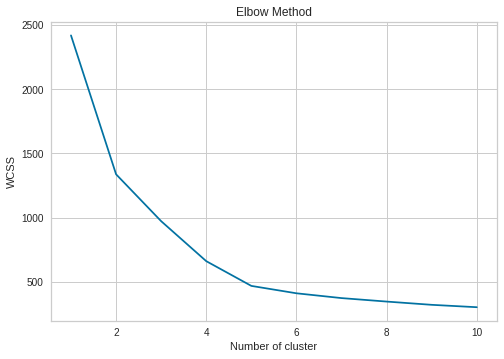

In [32]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(scale1_data)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of cluster')
plt.ylabel('WCSS')
plt.show()

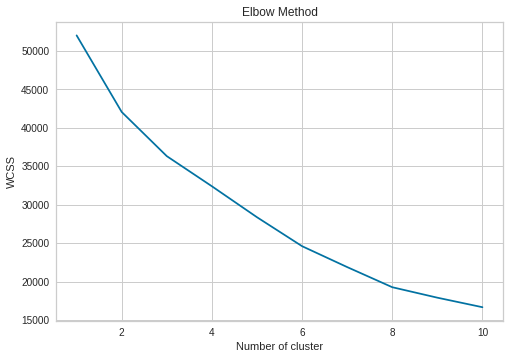

In [33]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(scale2_data)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of cluster')
plt.ylabel('WCSS')
plt.show()

In [34]:
cluster_1n = KMeans(6, random_state=42)
cluster_1n.fit(scale1_data)

KMeans(n_clusters=6, random_state=42)

In [35]:
sil_score= silhouette_score(scale1_data, cluster_1n.labels_)
print('Silhouette Score for normalized data by MinMaxScaler: ',sil_score)

Silhouette Score for normalized data by MinMaxScaler:  0.518684757663476


In [36]:
cluster_2n = KMeans(5, random_state=42)
cluster_2n.fit(scale2_data)

KMeans(n_clusters=5, random_state=42)

In [37]:
sil_score= silhouette_score(scale2_data, cluster_2n.labels_)
print('Silhouette Score for normalized data by StandardScaler: ',sil_score)

Silhouette Score for normalized data by StandardScaler:  0.3294874511326423


In [38]:
airline['clusterid_Kmeans'] = cluster_1n.labels_
air1['clusterid_Kmeans'] = cluster_1n.labels_

In [39]:
y=pd.DataFrame(cluster_1n.fit_predict(scale1_data),columns=['clusterid_Kmeans'])
y['clusterid_Kmeans'].value_counts()

0    1194
3     699
5     625
4     608
2     532
1     341
Name: clusterid_Kmeans, dtype: int64

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5')])

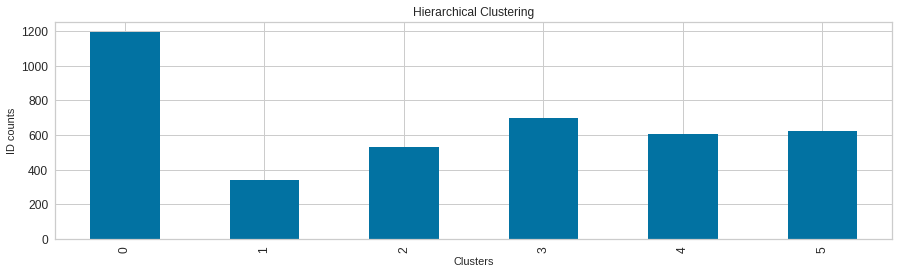

In [40]:
fig, ax = plt.subplots(figsize=(15, 4))
airline.groupby(['clusterid_Kmeans']).count()['ID'].plot(kind='bar')
plt.ylabel('ID Counts')
plt.title('Hierarchical Clustering')
ax.set_xlabel('Clusters')
ax.set_ylabel('ID counts')
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)

In [41]:
air1.groupby('clusterid_Kmeans').agg(['mean']).reset_index()

,clusterid_Kmeans,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,clusterid_1,clusterid_2
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,46926.743719,77.376884,1.144054,1.028476,1.006700,3747.433836,6.634003,159.219430,0.485762,4834.253769,0.0,1.153266,1.032663
1,1,70273.131965,254.744868,2.821114,1.000000,1.000000,19299.923754,16.551320,314.114370,0.826979,4281.240469,1.0,0.000000,0.005865
2,2,127171.740602,158.546992,4.381579,1.000000,1.046992,58711.048872,22.041353,910.251880,2.806391,5081.312030,1.0,3.000000,0.248120
3,3,30013.416309,98.054363,1.000000,1.000000,1.000000,2552.569385,6.101574,340.274678,0.948498,1568.864092,0.0,4.000000,1.011445
4,4,85718.856908,303.480263,1.067434,1.037829,1.003289,8212.774671,9.875000,1116.105263,3.412829,4418.677632,1.0,0.014803,0.986842
5,5,117737.968000,95.448000,3.566400,1.001600,1.022400,31191.422400,17.337600,226.950400,0.640000,4402.667200,0.0,2.000000,0.372800


DBSCAN

In [42]:
from sklearn.cluster import DBSCAN
scale1_data = scale1.fit_transform(air1)
print(scale1_data)

[[0.01650773 0.         0.         ... 0.25       0.25       0.        ]
 [0.01128788 0.         0.         ... 0.25       0.25       0.        ]
 [0.02425685 0.         0.         ... 0.25       0.25       0.        ]
 ...
 [0.0431695  0.         0.5        ... 0.         0.         0.2       ]
 [0.03220189 0.         0.         ... 1.         0.25       0.6       ]
 [0.00176908 0.         0.         ... 1.         0.25       0.6       ]]


In [43]:
dbscan = DBSCAN(eps=1, min_samples=12)
dbscan.fit(scale1_data)

DBSCAN(eps=1, min_samples=12)

In [44]:
dbscan.labels_

array([0, 0, 0, ..., 1, 0, 0])

In [45]:
y=pd.DataFrame(dbscan.fit_predict(scale1_data),columns=['clusterid_DBSCAN'])
y['clusterid_DBSCAN'].value_counts()

0    2518
1    1481
Name: clusterid_DBSCAN, dtype: int64

In [46]:
sil_score= silhouette_score(scale1_data, dbscan.labels_)
sil_score

0.3997593786523955

In [47]:
airline['clusterid_DBSCAN']=dbscan.labels_
air1['clusterid_DBSCAN']=dbscan.labels_

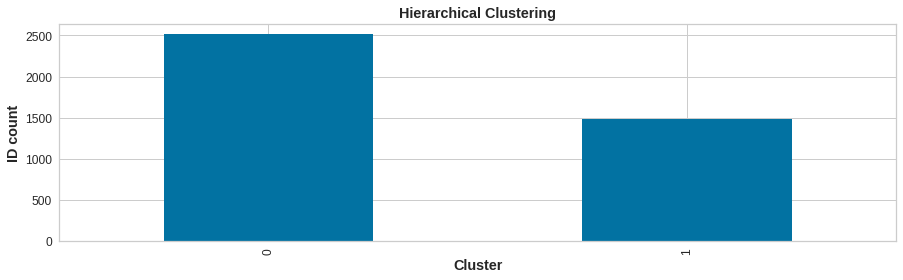

In [48]:
fig, ax = plt.subplots(figsize=(15, 4))
airline.groupby(['clusterid_DBSCAN']).count()['ID'].plot(kind='bar')
plt.ylabel('ID Count')
plt.title('Hierarchical Clustering',fontsize='large',fontweight='bold')
ax.set_xlabel('Cluster', fontsize='large', fontweight='bold')
ax.set_ylabel('ID count', fontsize='large', fontweight='bold')
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.show()

In [49]:
dbscan1 = DBSCAN(eps=0.9, min_samples=14)
dbscan1.fit(scale1_data)

y=pd.DataFrame(dbscan1.fit_predict(scale1_data),columns=['clusterid_DBSCAN'])
print(y['clusterid_DBSCAN'].value_counts())
sil_score= silhouette_score(scale1_data, dbscan1.labels_)
print('silhouette score: ',sil_score)

 0    2517
 1    1477
-1       5
Name: clusterid_DBSCAN, dtype: int64
silhouette score:  0.398577192730991


In [50]:
dbscan2 = DBSCAN(eps=0.4, min_samples=14)
dbscan2.fit(scale1_data)
y=pd.DataFrame(dbscan2.fit_predict(scale1_data),columns=['clusterid_DBSCAN'])
print(y['clusterid_DBSCAN'].value_counts())
sil_score= silhouette_score(scale1_data, dbscan2.labels_)
print('silhouette score: ',sil_score)

 0    1163
 6     699
 2     613
 3     583
 1     471
 4     335
-1      77
 5      42
 7      16
Name: clusterid_DBSCAN, dtype: int64
silhouette score:  0.5937416185945164


In [51]:
dbscan3 = DBSCAN(eps=0.6, min_samples=14)
dbscan3.fit(scale1_data)
y=pd.DataFrame(dbscan3.fit_predict(scale1_data),columns=['clusterid_DBSCAN'])
print(y['clusterid_DBSCAN'].value_counts())
sil_score= silhouette_score(scale1_data, dbscan3.labels_)
print('silhouette score: ',sil_score)

 0    1191
 5     699
 2     618
 3     589
 1     523
 4     340
-1      27
 6      12
Name: clusterid_DBSCAN, dtype: int64
silhouette score:  0.6292402032690787


In [52]:
airline['clusterid_DBSCAN'] = dbscan3.labels_
air1['clusterid_DBSCAN'] = dbscan3.labels_

In [53]:
airline.head()

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,clusterid_1,clusterid_2,clusterid_Kmeans,clusterid_DBSCAN
0,1,28143,0,1,1,1,174,1,0,0,7000,0,1,1,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,1,1,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,1,1,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,1,1,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,3,0,2,1


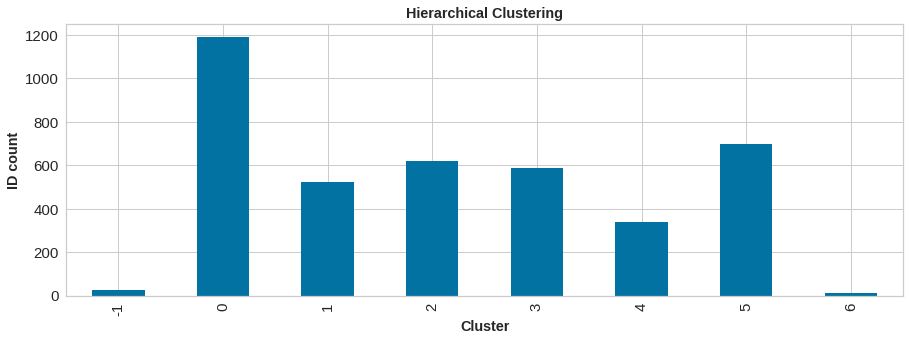

In [54]:
fig, ax = plt.subplots(figsize=(15, 5))
airline.groupby(['clusterid_DBSCAN']).count()['ID'].plot(kind='bar')
plt.ylabel('ID Count')
plt.title('Hierarchical Clustering',fontsize='large',fontweight='bold')
ax.set_xlabel('Cluster', fontsize='large', fontweight='bold')
ax.set_ylabel('ID count', fontsize='large', fontweight='bold')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show()

In [55]:
air1.groupby('clusterid_DBSCAN').agg(['mean']).reset_index()

,clusterid_DBSCAN,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,clusterid_1,clusterid_2,clusterid_Kmeans
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,-1,198897.888889,477.592593,3.037037,1.148148,2.814815,76068.481481,31.296296,3269.814815,8.888889,4298.148148,0.62963,2.037037,3.222222,3.037037
1,0,46828.219144,77.571788,1.144416,1.028547,1.000000,3630.084803,6.623846,159.620487,0.486986,4836.767422,0.00000,1.151973,1.025189,0.000000
2,1,128144.883365,159.577438,4.384321,1.000000,1.000000,57731.363289,21.841300,878.879541,2.755258,5092.133843,1.00000,3.000000,0.187380,2.000000
3,2,116706.328479,96.529126,3.563107,1.000000,1.000000,30816.666667,17.226537,224.990291,0.634304,4406.014563,0.00000,2.000000,0.333333,5.000000
4,3,82300.157895,308.716469,1.064516,1.005093,1.000000,7437.541596,9.258065,1038.801358,3.174873,4406.247878,1.00000,0.000000,0.933786,4.000000
5,4,69973.611765,228.067647,2.814706,1.000000,1.000000,19293.800000,16.532353,312.244118,0.820588,4276.350000,1.00000,0.000000,0.005882,1.000000
6,5,30013.416309,98.054363,1.000000,1.000000,1.000000,2552.569385,6.101574,340.274678,0.948498,1568.864092,0.00000,4.000000,1.011445,3.000000
7,6,66631.083333,0.000000,1.083333,2.416667,1.000000,18492.250000,21.166667,566.916667,2.333333,5125.083333,1.00000,0.000000,3.000000,4.000000
